# Réalisation informatique des tests

#### prototype : 
```python
[clas,g2]=coalescence(x,K,g)
```

Avec un calcul de distance : 
$$x,y\in R : d(x,y)=(x-y)^t(x-y)$$

- x : matrice contenant les différents individus rangés par colonne (nombre ligne N et 2 colonnes).
- K : nombre de classes désiré
- g : centres de gravité initiaux rangés par colonne -> matrice de K lignes et 2 colonnes

- clas : vecteur indiquant le résultat de l'algo de coalescence. clas[i] indique le numéro de la classe de l'individu x[:, i]
- g2 : contient les centres de gravité finaux rangés par colonne

$$N_2((2,2)^T, 2I_2)=\frac{1}{2\pi}\exp \left \{ -\frac{1}{2} \left (x-\begin{pmatrix}2\\ 2\end{pmatrix} \right)^T\begin{bmatrix}2 & 0\\ 0 & 2\end{bmatrix}^{-1}\left (x-\begin{pmatrix}4\\ 4\end{pmatrix} \right ) \right \}$$
$$N_2((-4,-4)^T, 6I_2)=\frac{1}{8\pi}\exp\left \{ -\frac{1}{2}\left(x-\begin{pmatrix}-4\\ -4\end{pmatrix} \right)^T\begin{bmatrix}6 & 0\\ 0 & 6\end{bmatrix}^{-1}\left (x-\begin{pmatrix}-4\\ -4\end{pmatrix}\right ) \right \}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.legend(*args, **kwargs)>

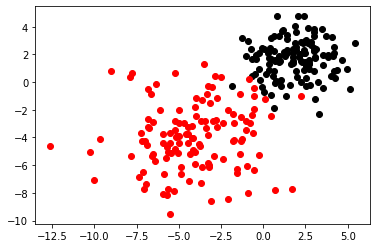

In [3]:
mean_1 = np.array([2, 2])
mean_2 = np.array([-4, -4])

cov_1 = np.array([[2, 0], [0, 2]])
cov_2 = np.array([[6, 0], [0, 6]])

X1 = (np.random.multivariate_normal(mean_1, cov_1, 128))
X2 = (np.random.multivariate_normal(mean_2, cov_2, 128))


# Affichage des données

plt.plot(X1[:, 0], X1[:,1], "o", label = 'Individu', color = "black")
plt.plot(X2[:, 0], X2[:,1], "o", label = 'Individu', color = "red")

plt.legend

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# quand on calcul les distances, on fait l'écart type de chaque cluster
def dist(x, y) :
    res = np.transpose((x - y)) * (x - y)
    return np.linalg.norm(res)

def compute_gravity_centers(x, clas, K) :
    g2 = np.zeros((K, len(x[0])))
    nb_ind = np.zeros(len(g2))
    for i in range(len(x)) :
        if nb_ind[clas[i]] == 0 :
            g2[clas[i]] = x[i]
        else :
            g2[clas[i]] = np.add(g2[clas[i]], x[i])

        nb_ind[clas[i]] += 1

    for i in range(len(g2)) :
        g2[i] /= nb_ind[i]

    return g2

def compute_clas(x, g) :
    clas = []
    for ind in x :
        dist_array = []
        for grav in g :
            dist_array.append(dist(grav, ind))
        clas.append(dist_array.index(min(dist_array)))
    return clas
    

def coalescence(x, K, g) :
    clas = []
    g_old = g

    clas = compute_clas(x, g_old)
    g_new = compute_gravity_centers(x, clas, K)    

    while not(np.array_equal(g_old, g_new)) :
        g_old = g_new
        clas = compute_clas(x, g_old)
        g_new = compute_gravity_centers(x, clas, K)
        
    return clas, g_new


def coalescence2(x, K) :
    centers = x[np.random.choice(x.shape[0], K, replace=False), :]
    return coalescence(x, K, centers)



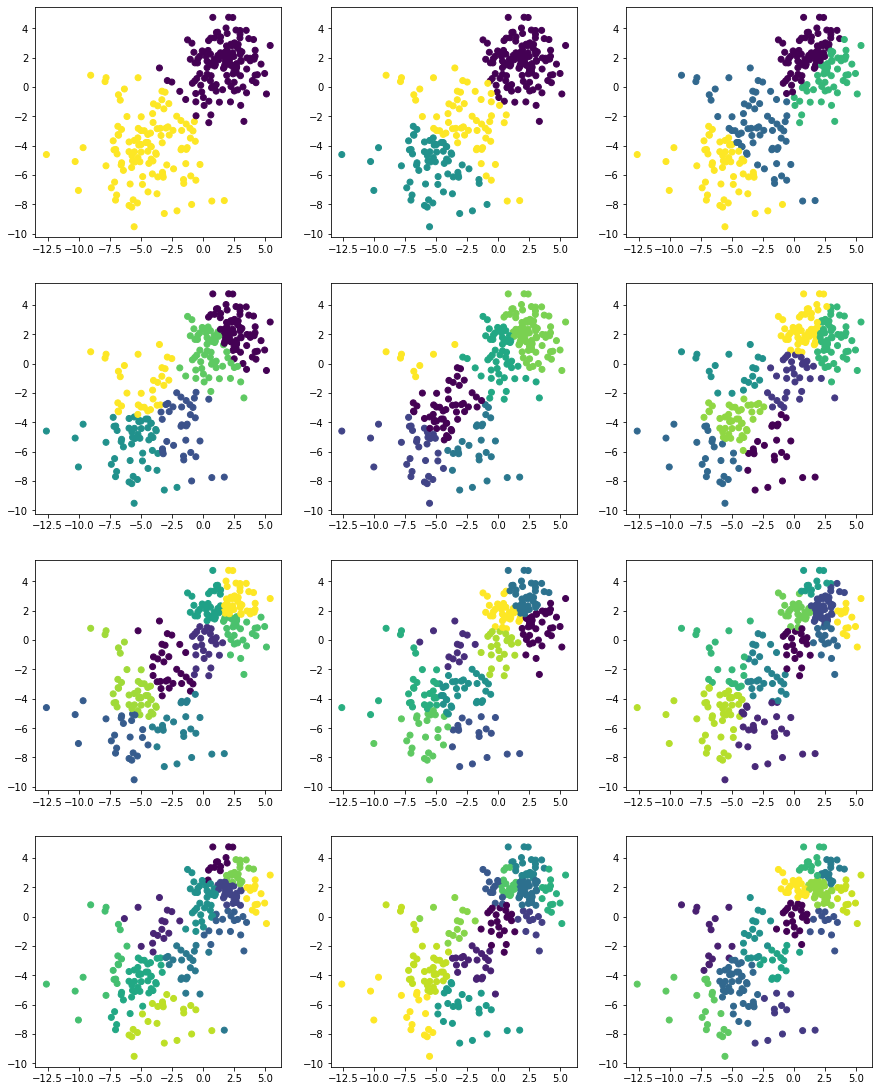

In [6]:

data = np.concatenate((X1, X2), axis=0)
K_max = 13
plt.rcParams['figure.figsize'] = (15, K_max * 1.5)

for i in range(1, K_max):
    y_kmeans, centers = coalescence2(data, i + 1)
    plt.subplot(K_max // 3, 3, i)
    plt.scatter(data[:, 0], data[:, 1], c=y_kmeans)